In [86]:
import pandas as pd

# Read data
df = pd.read_csv("hazadous_filled.csv")

df.head()

df_structure = df.info()
df_structure

df_dimensions = df.shape
df_dimensions

df_columns = df.columns
df_columns

df_description = df.describe()
df_description

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4045 entries, 0 to 4044
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           4045 non-null   int64  
 1   LOCATION_LATITUDE            4045 non-null   float64
 2   LOCATION_LONGITUDE           4045 non-null   float64
 3   COMMODITY_RELEASED_TYPE      4045 non-null   object 
 4   UNINTENTIONAL_RELEASE_BBLS   4045 non-null   float64
 5   INTENTIONAL_RELEASE_BBLS     4045 non-null   float64
 6   RECOVERED_BBLS               4045 non-null   float64
 7   FATAL                        4045 non-null   int64  
 8   INJURE                       4045 non-null   int64  
 9   ACCIDENT_IDENTIFIER          4045 non-null   object 
 10  SYSTEM_PART_INVOLVED         4045 non-null   object 
 11  PIPE_FAC_NAME                4045 non-null   object 
 12  DESIGNATED_LOCATION          4045 non-null   object 
 13  FEDERAL           

,ID,LOCATION_LATITUDE,LOCATION_LONGITUDE,UNINTENTIONAL_RELEASE_BBLS,INTENTIONAL_RELEASE_BBLS,RECOVERED_BBLS,FATAL,INJURE,ACCIDENT_PSIG,EST_COST_OPER_PAID,EST_COST_GAS_RELEASED,EST_COST_PROP_DAMAGE,EST_COST_EMERGENCY,EST_COST_ENVIRONMENTAL,EST_COST_OTHER
count,4045.000000,4045.000000,4045.000000,4045.000000,4045.000000,4045.000000,4045.000000,4045.000000,4045.000000,4.045000e+03,4.045000e+03,4.045000e+03,4.045000e+03,4.045000e+03,4.045000e+03
mean,2173.667491,35.150565,-96.750994,273.517295,119.015422,110.648865,0.003708,0.008158,349.279743,4.218200e+04,1.248511e+04,1.286191e+05,3.663914e+05,3.330522e+05,3.101527e+04
std,1337.391651,5.607509,9.747053,1839.421238,1721.241388,863.667840,0.098133,0.144749,428.546320,7.464046e+05,7.984275e+04,7.897280e+05,7.909712e+06,1.012712e+07,5.562686e+05
min,0.000000,18.431905,-158.093700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1063.000000,30.170449,-101.793900,0.500000,0.000000,0.100000,0.000000,0.000000,20.000000,0.000000e+00,2.500000e+01,2.500000e+02,7.500000e+01,0.000000e+00,0.000000e+00
50%,2085.000000,33.596670,-96.147769,3.000000,0.000000,1.000000,0.000000,0.000000,153.000000,0.000000e+00,1.500000e+02,5.000000e+03,5.000000e+03,5.000000e+02,0.000000e+00
75%,3100.000000,39.273257,-92.847380,26.000000,0.000000,12.000000,0.000000,0.000000,553.000000,0.000000e+00,1.003000e+03,4.100000e+04,2.886300e+04,1.964300e+04,0.000000e+00
max,5137.000000,70.278170,-66.006017,48400.000000,70191.000000,35566.000000,5.000000,4.000000,3001.000000,3.000000e+07,2.570476e+06,2.700000e+07,4.421575e+08,6.350000e+08,2.235000e+07


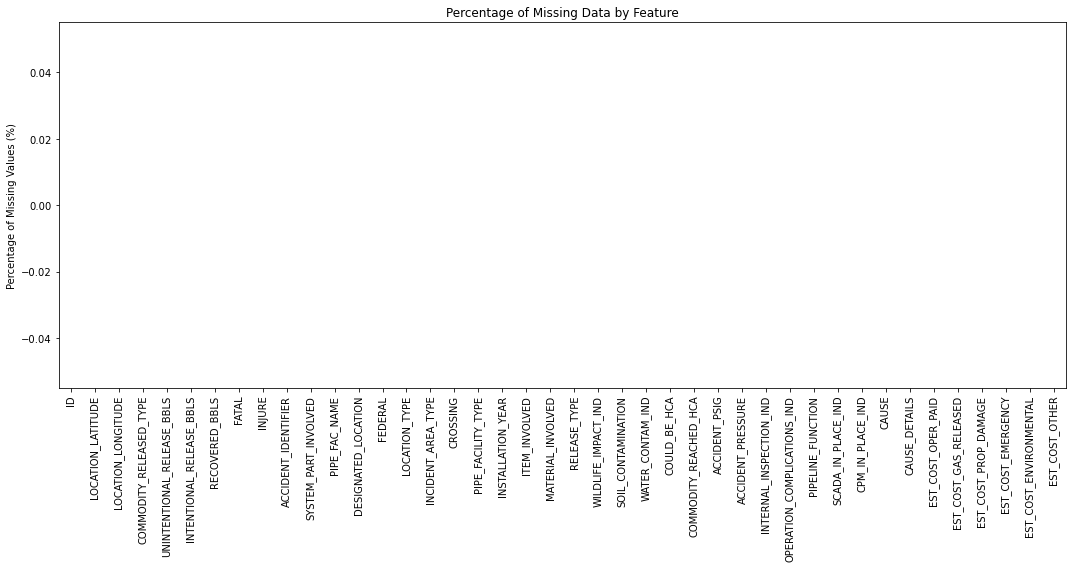

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the percentage of missing values for each column
missing_data_percentage = df.isnull().mean() * 100

# Plot the missing data percentage using seaborn's barplot
plt.figure(figsize=(15, 8))
sns.barplot(x=missing_data_percentage.index, y=missing_data_percentage.values)
plt.xticks(rotation=90)
plt.ylabel('Percentage of Missing Values (%)')
plt.title('Percentage of Missing Data by Feature')
plt.tight_layout()
plt.show()

In [88]:
# Construct the new column 'EST_COST_TOTAL'
df["EST_COST_TOTAL"] = (df["EST_COST_PROP_DAMAGE"] + df["EST_COST_OTHER"] +
                     df["EST_COST_OPER_PAID"] + df["EST_COST_GAS_RELEASED"] +
                     df["EST_COST_ENVIRONMENTAL"] + df["EST_COST_EMERGENCY"])

# Check the first few rows to verify the new column
df[["EST_COST_TOTAL", "EST_COST_PROP_DAMAGE", "EST_COST_OTHER", 
      "EST_COST_OPER_PAID", "EST_COST_GAS_RELEASED", 
      "EST_COST_ENVIRONMENTAL", "EST_COST_EMERGENCY"]].head()

,EST_COST_TOTAL,EST_COST_PROP_DAMAGE,EST_COST_OTHER,EST_COST_OPER_PAID,EST_COST_GAS_RELEASED,EST_COST_ENVIRONMENTAL,EST_COST_EMERGENCY
0,25103.0,15000.0,0.0,0.0,103.0,0.0,10000.0
1,1660.0,1000.0,0.0,0.0,160.0,500.0,0.0
2,3146.0,2500.0,0.0,0.0,646.0,0.0,0.0
3,3094.0,2500.0,0.0,0.0,594.0,0.0,0.0
4,221040.0,50000.0,0.0,0.0,1040.0,75000.0,95000.0


In [89]:
# Define the list of numeric and categorical variables
numeric_vars = ["LOCATION_LATITUDE", "LOCATION_LONGITUDE", "UNINTENTIONAL_RELEASE_BBLS", 
                "INTENTIONAL_RELEASE_BBLS", "RECOVERED_BBLS", "INSTALLATION_YEAR", 
                "ACCIDENT_PSIG", "EST_COST_OPER_PAID", "EST_COST_GAS_RELEASED", 
                "EST_COST_PROP_DAMAGE", "EST_COST_EMERGENCY", "EST_COST_ENVIRONMENTAL", 
                "EST_COST_OTHER", "EST_COST_TOTAL"]

categorical_vars = ["COMMODITY_RELEASED_TYPE", "FATAL", "INJURE", "ACCIDENT_IDENTIFIER", 
                    "SYSTEM_PART_INVOLVED", "PIPE_FAC_NAME", "DESIGNATED_LOCATION", 
                    "FEDERAL", "LOCATION_TYPE", "INCIDENT_AREA_TYPE", "CROSSING", 
                    "PIPE_FACILITY_TYPE", "ITEM_INVOLVED", "MATERIAL_INVOLVED", 
                    "RELEASE_TYPE", "WILDLIFE_IMPACT_IND", "SOIL_CONTAMINATION", 
                    "WATER_CONTAM_IND", "COULD_BE_HCA", "COMMODITY_REACHED_HCA", 
                    "ACCIDENT_PRESSURE", "INTERNAL_INSPECTION_IND", 
                    "OPERATION_COMPLICATIONS_IND", "PIPELINE_FUNCTION", "SCADA_IN_PLACE_IND", 
                    "CPM_IN_PLACE_IND", "CAUSE","CAUSE_DETAILS"]

# Drop the specified columns
columns_to_drop = ["ID", "INSTALLATION_YEAR", "EST_COST_OPER_PAID", 
                   "EST_COST_GAS_RELEASED", "EST_COST_PROP_DAMAGE", 
                   "EST_COST_EMERGENCY", "EST_COST_ENVIRONMENTAL", 
                   "EST_COST_OTHER", "CAUSE_DETAILS"]

df.drop(columns=columns_to_drop, inplace=True)

# Check the first few rows to verify the changes
df.head()

,LOCATION_LATITUDE,LOCATION_LONGITUDE,COMMODITY_RELEASED_TYPE,UNINTENTIONAL_RELEASE_BBLS,INTENTIONAL_RELEASE_BBLS,RECOVERED_BBLS,FATAL,INJURE,ACCIDENT_IDENTIFIER,SYSTEM_PART_INVOLVED,...,COMMODITY_REACHED_HCA,ACCIDENT_PSIG,ACCIDENT_PRESSURE,INTERNAL_INSPECTION_IND,OPERATION_COMPLICATIONS_IND,PIPELINE_FUNCTION,SCADA_IN_PLACE_IND,CPM_IN_PLACE_IND,CAUSE,EST_COST_TOTAL
0,45.565061,-122.742638,REFINED AND/OR PETROLEUM PRODUCT (NON-HVL) WHI...,0.90,0.00,0.00,0,0,CONTROLLER,ONSHORE TERMINAL/TANK FARM EQUIPMENT AND PIPING,...,YES,151.0,"PRESSURE EXCEEDED MOP, BUT DID NOT EXCEED 110%...",UNKNOWN,UNKNOWN,> 20% SMYS REGULATED TRANSMISSION,NO,NO,OTHER ACCIDENT CAUSE,25103.0
1,30.549014,-91.168398,REFINED AND/OR PETROLEUM PRODUCT (NON-HVL) WHI...,0.88,0.00,0.88,0,0,"LOCAL OPERATING PERSONNEL, INCLUDING CONTRACTORS",ONSHORE TERMINAL/TANK FARM EQUIPMENT AND PIPING,...,NO,18.0,PRESSURE DID NOT EXCEED MOP,UNKNOWN,UNKNOWN,> 20% SMYS REGULATED TRANSMISSION,YES,NO,EQUIPMENT FAILURE,1660.0
2,29.845391,-94.908820,HVL OR OTHER FLAMMABLE OR TOXIC FLUID WHICH IS...,1.42,8.77,0.00,0,0,"LOCAL OPERATING PERSONNEL, INCLUDING CONTRACTORS",ONSHORE PUMP/METER STATION EQUIPMENT AND PIPING,...,YES,834.0,PRESSURE DID NOT EXCEED MOP,UNKNOWN,UNKNOWN,> 20% SMYS REGULATED TRANSMISSION,YES,NO,EQUIPMENT FAILURE,3146.0
3,29.845391,-94.908820,HVL OR OTHER FLAMMABLE OR TOXIC FLUID WHICH IS...,0.53,8.77,0.00,0,0,"LOCAL OPERATING PERSONNEL, INCLUDING CONTRACTORS",ONSHORE PUMP/METER STATION EQUIPMENT AND PIPING,...,YES,851.0,PRESSURE DID NOT EXCEED MOP,UNKNOWN,UNKNOWN,> 20% SMYS REGULATED TRANSMISSION,YES,NO,EQUIPMENT FAILURE,3094.0
4,29.988186,-93.987212,CRUDE OIL,13.00,0.00,13.00,0,0,"LOCAL OPERATING PERSONNEL, INCLUDING CONTRACTORS",ONSHORE TERMINAL/TANK FARM EQUIPMENT AND PIPING,...,YES,13.0,PRESSURE DID NOT EXCEED MOP,UNKNOWN,UNKNOWN,< 20% SMYS REGULATED TRANSMISSION,NO,NO,CORROSION FAILURE,221040.0


In [90]:
# Save the processed data to a new CSV file
output_file_path = "processed_data.csv"
df.to_csv(output_file_path, index=False)

output_file_path

'processed_data.csv'

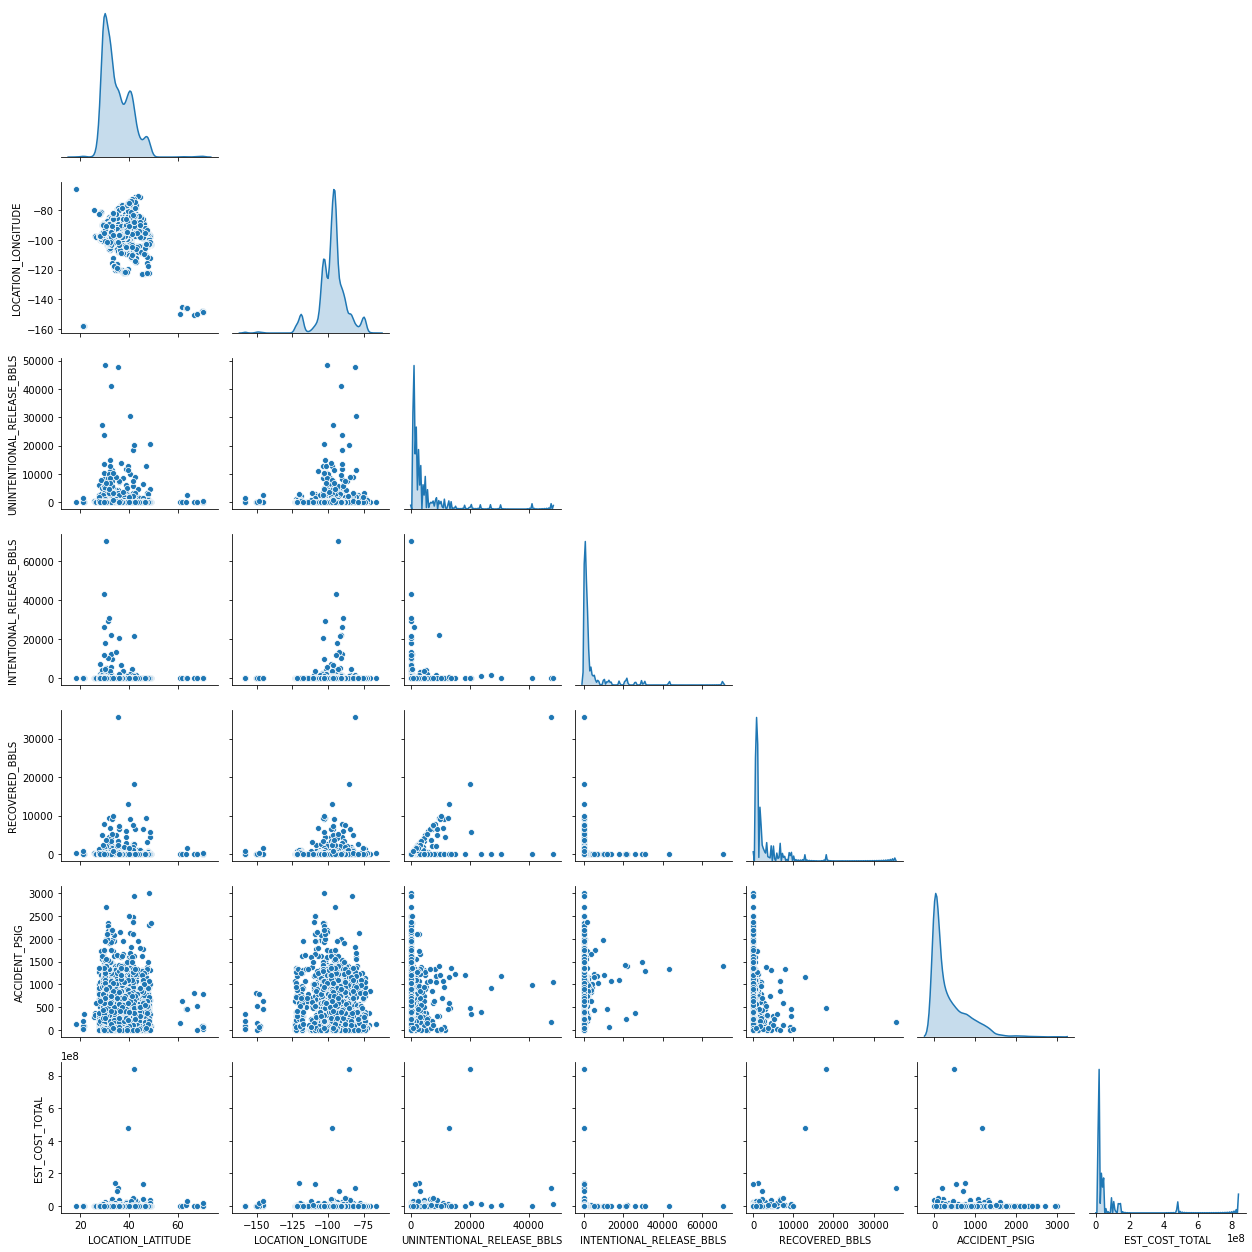

In [91]:
# Remove the deleted columns from the numeric_vars list
for col in columns_to_drop:
    if col in numeric_vars:
        numeric_vars.remove(col)
        
# Plot the distribution of numeric variables using the correct column name "COST_TOTAL"
sns.pairplot(df[numeric_vars], corner=True, diag_kind="kde")
plt.tight_layout()
plt.show()

**LOCATION_LATITUDE and LOCATION_LONGITUDE**:
- **KDE**: From the KDE plot of `LOCATION_LATITUDE`, most accidents seem to occur around latitudes between approximately 30° and 40°. For `LOCATION_LONGITUDE`, a majority of the accidents appear to be concentrated around longitudes of approximately -100° to -90°.
- **Relationship**: Observing the scatter plot between the two, there's a distinct concentration around 30° latitude and -95° longitude, suggesting a specific region that experiences frequent accidents.

**UNINTENTIONAL_RELEASE_BBLS, INTENTIONAL_RELEASE_BBLS, and RECOVERED_BBLS**:
- **KDE**: The KDE plots for these variables show that the majority of accidents, both unintentional and intentional releases, are concentrated in a smaller range, specifically around 0 to 10 barrels. Additionally, a majority of the oil spilled in these accidents seems to be successfully recovered post-incident.

**ACCIDENT_PSIG**:
- **KDE**: The KDE for this variable suggests that most accidents occur at pressures below 200 PSIG.

**COST_TOTAL and its components**:
- **KDE**: The KDE for `COST_TOTAL` suggests that a majority of the accidents incur a total cost between $0 and $500,000, though there are some high-cost outliers.
- **Relationship**: The relationship between `UNINTENTIONAL_RELEASE_BBLS` and `COST_TOTAL` suggests that the more barrels of oil spilled in an accident, the higher the total cost tends to be. This is intuitive as larger spills may require more extensive cleanup and repair efforts.

In summary, these visuals offer the following insights:
1. There seems to be a specific geographical region, approximately around 30° latitude and -95° longitude, where accidents occur more frequently.
2. While most accidents result in a smaller spill volume, even minor spills can result in significant costs.
3. Accidents tend to occur at lower pressures, typically below 200 PSIG.

These insights could guide future preventive measures, such as intensifying regulations and inspections in accident-prone regions or improving operating and maintenance standards at lower pressures.

In [92]:
# Check which numerical columns have values less than or equal to 0
columns_to_adjust = []
for col in numeric_vars:
    if df[col].min() <= 0:
        columns_to_adjust.append(col)

columns_to_adjust

['LOCATION_LONGITUDE',
 'UNINTENTIONAL_RELEASE_BBLS',
 'INTENTIONAL_RELEASE_BBLS',
 'RECOVERED_BBLS',
 'ACCIDENT_PSIG',
 'EST_COST_TOTAL']

In [93]:
from scipy.stats import boxcox

# Adjust columns with values less than or equal to 0
for col in columns_to_adjust:
    df[col] = df[col] + abs(df[col].min()) + 1

# Apply Box-Cox transformation to all numerical variables
transformed_data = df.copy()
for col in numeric_vars:
    transformed_data[col], _ = boxcox(df[col])

transformed_data[numeric_vars].head()

,LOCATION_LATITUDE,LOCATION_LONGITUDE,UNINTENTIONAL_RELEASE_BBLS,INTENTIONAL_RELEASE_BBLS,RECOVERED_BBLS,ACCIDENT_PSIG,EST_COST_TOTAL
0,0.641451,370.969214,0.582846,0.000000,0.000000,8.455837,12.310850
1,0.639989,1153.079913,0.574134,0.000000,0.554816,3.958262,8.542229
2,0.639873,1040.530487,0.774518,0.284662,0.000000,13.741887,9.395015
3,0.639873,1040.530487,0.398802,0.284662,0.000000,13.815351,9.372521
4,0.639897,1067.780578,1.811692,0.000000,1.598120,3.436289,15.617520


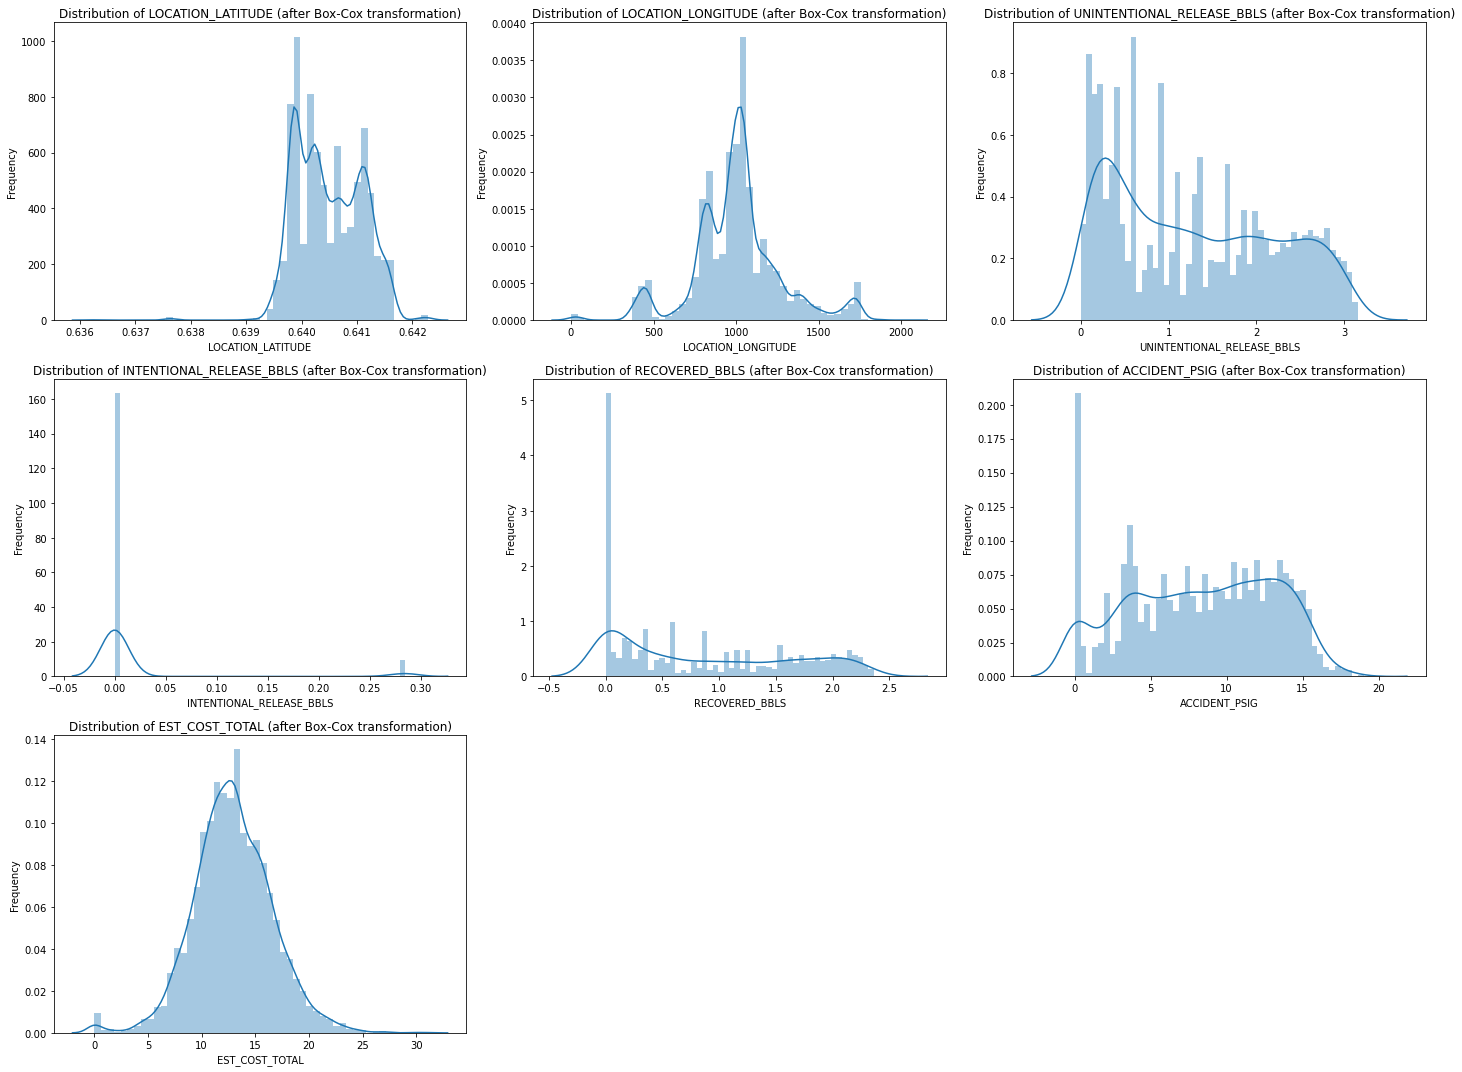

In [94]:
# Plot the distribution of each transformed numerical variable
plt.figure(figsize=(20, 15))

for index, col in enumerate(numeric_vars, 1):
    plt.subplot(3, 3, index)
    sns.distplot(transformed_data[col], bins=50, kde=True)
    plt.title(f'Distribution of {col} (after Box-Cox transformation)')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [99]:
# Combine transformed numerical variables with categorical variables
final_data = pd.concat([transformed_data[numeric_vars], df[categorical_vars]], axis=1)

# # Save the final data to a new CSV file
final_output_file_path = "final_data.csv"
final_data.to_csv(final_output_file_path, index=False)

final_output_file_path

'final_data.csv'

In [100]:
from sklearn.preprocessing import LabelEncoder
# categorical_vars.remove('CAUSE')
# Identify columns with mixed data types
mixed_type_columns = []
for col in categorical_vars:
    unique_types = {type(item) for item in final_data[col]}
    if len(unique_types) > 1:
        mixed_type_columns.append(col)

# Convert mixed type columns to string
for col in mixed_type_columns:
    final_data[col] = final_data[col].astype(str)

# Apply Label Encoding to categorical variables
label_encoders = {}
for col in categorical_vars:
    le = LabelEncoder()
    final_data[col] = le.fit_transform(final_data[col])
    label_encoders[col] = le

# Display the first few rows of the encoded data
final_data.head()

,LOCATION_LATITUDE,LOCATION_LONGITUDE,UNINTENTIONAL_RELEASE_BBLS,INTENTIONAL_RELEASE_BBLS,RECOVERED_BBLS,ACCIDENT_PSIG,EST_COST_TOTAL,COMMODITY_RELEASED_TYPE,FATAL,INJURE,...,WATER_CONTAM_IND,COULD_BE_HCA,COMMODITY_REACHED_HCA,ACCIDENT_PRESSURE,INTERNAL_INSPECTION_IND,OPERATION_COMPLICATIONS_IND,PIPELINE_FUNCTION,SCADA_IN_PLACE_IND,CPM_IN_PLACE_IND,CAUSE
0,0.641451,370.969214,0.582846,0.000000,0.000000,8.455837,12.310850,4,0,0,...,0,1,1,2,1,1,3,0,0,6
1,0.639989,1153.079913,0.574134,0.000000,0.554816,3.958262,8.542229,4,0,0,...,0,1,0,0,1,1,3,1,0,1
2,0.639873,1040.530487,0.774518,0.284662,0.000000,13.741887,9.395015,3,0,0,...,0,1,1,0,1,1,3,1,0,1
3,0.639873,1040.530487,0.398802,0.284662,0.000000,13.815351,9.372521,3,0,0,...,0,1,1,0,1,1,3,1,0,1
4,0.639897,1067.780578,1.811692,0.000000,1.598120,3.436289,15.617520,2,0,0,...,0,1,1,0,1,1,0,0,0,0


In [101]:
# Extract the label encoding mappings for each categorical variable
label_mappings = {}
for col, le in label_encoders.items():
    label_mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))

# Convert the mappings to a DataFrame for better visualization and export
label_mappings_df = pd.DataFrame.from_dict(label_mappings, orient='index').T

# Save the label mappings to a CSV file
mappings_file_path = "label_mappings.csv"
label_mappings_df.to_csv(mappings_file_path, index=False)

mappings_file_path

'label_mappings.csv'

In [102]:
from sklearn.feature_selection import VarianceThreshold

# Load the final_processed_data_without_cause dataset
final_data = pd.read_csv(final_output_file_path)
# Check data types of columns
column_data_types = final_data.dtypes

# Identify columns with object (string) data type
string_columns = column_data_types[column_data_types == 'object'].index.tolist()

string_columns

# Apply Label Encoding to the string columns
for col in string_columns:
    le = LabelEncoder()
    final_data[col] = le.fit_transform(final_data[col])
    label_encoders[col] = le

# Apply Variance Threshold
selector = VarianceThreshold()
selected_data = selector.fit_transform(final_data)

# Get the columns that were retained
selected_columns = final_data.columns[selector.get_support()]

# Convert the selected data back to DataFrame
selected_data_df = pd.DataFrame(selected_data, columns=selected_columns)

# Display the first few rows of the selected data
selected_data_df.head()

,LOCATION_LATITUDE,LOCATION_LONGITUDE,UNINTENTIONAL_RELEASE_BBLS,INTENTIONAL_RELEASE_BBLS,RECOVERED_BBLS,ACCIDENT_PSIG,EST_COST_TOTAL,COMMODITY_RELEASED_TYPE,FATAL,INJURE,...,WATER_CONTAM_IND,COULD_BE_HCA,COMMODITY_REACHED_HCA,ACCIDENT_PRESSURE,INTERNAL_INSPECTION_IND,OPERATION_COMPLICATIONS_IND,PIPELINE_FUNCTION,SCADA_IN_PLACE_IND,CPM_IN_PLACE_IND,CAUSE
0,0.641451,370.969214,0.582846,0.000000,0.000000,8.455837,12.310850,4.0,0.0,0.0,...,0.0,1.0,1.0,2.0,1.0,1.0,3.0,0.0,0.0,6.0
1,0.639989,1153.079913,0.574134,0.000000,0.554816,3.958262,8.542229,4.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,3.0,1.0,0.0,1.0
2,0.639873,1040.530487,0.774518,0.284662,0.000000,13.741887,9.395015,3.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,3.0,1.0,0.0,1.0
3,0.639873,1040.530487,0.398802,0.284662,0.000000,13.815351,9.372521,3.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,3.0,1.0,0.0,1.0
4,0.639897,1067.780578,1.811692,0.000000,1.598120,3.436289,15.617520,2.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [103]:
import numpy as np

from sklearn.feature_selection import mutual_info_regression

# Extract the target variable
Y = selected_data_df['EST_COST_TOTAL']
X = selected_data_df.drop(columns=['EST_COST_TOTAL'])
# Compute mutual information between each feature and the target
mutual_info_scores = mutual_info_regression(X, Y, random_state=42)
# Compute mutual information and sort columns by their scores
sorted_columns = X.columns[np.argsort(mutual_info_scores)[::-1]]

# Display the features sorted by their mutual information scores
sorted_features_mi = pd.DataFrame({
    'Feature': sorted_columns,
    'Mutual Information': np.sort(mutual_info_scores)[::-1]
})

sorted_features_mi

,Feature,Mutual Information
0,UNINTENTIONAL_RELEASE_BBLS,0.247034
1,RECOVERED_BBLS,0.227134
2,RELEASE_TYPE,0.155706
3,CAUSE,0.149479
4,ITEM_INVOLVED,0.149278
5,INCIDENT_AREA_TYPE,0.148102
6,LOCATION_TYPE,0.108347
7,SYSTEM_PART_INVOLVED,0.081298
8,OPERATION_COMPLICATIONS_IND,0.071135
9,INTERNAL_INSPECTION_IND,0.066501


In [104]:
# Select columns with positive mutual information scores
selected_features = sorted_features_mi[sorted_features_mi['Mutual Information'] > 0]['Feature'].tolist()

# Filter the data to retain only the selected features
filtered_data = selected_data_df[selected_features]

# Display the first few rows of the filtered data
filtered_data.head()

,UNINTENTIONAL_RELEASE_BBLS,RECOVERED_BBLS,RELEASE_TYPE,CAUSE,ITEM_INVOLVED,INCIDENT_AREA_TYPE,LOCATION_TYPE,SYSTEM_PART_INVOLVED,OPERATION_COMPLICATIONS_IND,INTERNAL_INSPECTION_IND,...,INTENTIONAL_RELEASE_BBLS,PIPELINE_FUNCTION,PIPE_FACILITY_TYPE,CROSSING,DESIGNATED_LOCATION,COULD_BE_HCA,SCADA_IN_PLACE_IND,COMMODITY_REACHED_HCA,FEDERAL,INJURE
0,0.582846,0.000000,4.0,6.0,2.0,0.0,2.0,4.0,1.0,1.0,...,0.000000,3.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.574134,0.554816,4.0,1.0,17.0,3.0,2.0,4.0,1.0,1.0,...,0.000000,3.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.774518,0.000000,4.0,1.0,2.0,0.0,2.0,3.0,1.0,1.0,...,0.284662,3.0,1.0,0.0,2.0,1.0,1.0,1.0,0.0,0.0
3,0.398802,0.000000,4.0,1.0,2.0,0.0,2.0,3.0,1.0,1.0,...,0.284662,3.0,1.0,0.0,2.0,1.0,1.0,1.0,0.0,0.0
4,1.811692,1.598120,3.0,0.0,9.0,2.0,0.0,4.0,1.0,1.0,...,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [105]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(filtered_data, Y)

# Get feature importances from the model
feature_importances = rf.feature_importances_

# Sort the features based on their importances
sorted_features_rf = pd.DataFrame({
    'Feature': filtered_data.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

sorted_features_rf

,Feature,Importance
0,UNINTENTIONAL_RELEASE_BBLS,0.310537
5,INCIDENT_AREA_TYPE,0.120407
1,RECOVERED_BBLS,0.089202
11,LOCATION_LONGITUDE,0.072970
17,ACCIDENT_PSIG,0.059370
14,LOCATION_LATITUDE,0.052586
15,PIPE_FAC_NAME,0.046387
2,RELEASE_TYPE,0.038490
10,WATER_CONTAM_IND,0.038051
4,ITEM_INVOLVED,0.022267


In [106]:
# Select features with importance greater than 0.001
selected_features_rf = sorted_features_rf[sorted_features_rf['Importance'] > 0.001]['Feature'].tolist()

# Filter the data to retain only the selected features
filtered_data_rf = filtered_data[selected_features_rf]

# Display the first few rows of the filtered data
filtered_data_rf.head()

,UNINTENTIONAL_RELEASE_BBLS,INCIDENT_AREA_TYPE,RECOVERED_BBLS,LOCATION_LONGITUDE,ACCIDENT_PSIG,LOCATION_LATITUDE,PIPE_FAC_NAME,RELEASE_TYPE,WATER_CONTAM_IND,ITEM_INVOLVED,...,COMMODITY_REACHED_HCA,SCADA_IN_PLACE_IND,MATERIAL_INVOLVED,COULD_BE_HCA,PIPELINE_FUNCTION,PIPE_FACILITY_TYPE,INTERNAL_INSPECTION_IND,CROSSING,INJURE,WILDLIFE_IMPACT_IND
0,0.582846,0.0,0.000000,370.969214,8.455837,0.641451,2714.0,4.0,0.0,2.0,...,1.0,0.0,0.0,1.0,3.0,0.0,1.0,0.0,0.0,0.0
1,0.574134,3.0,0.554816,1153.079913,3.958262,0.639989,271.0,4.0,0.0,17.0,...,0.0,1.0,0.0,1.0,3.0,0.0,1.0,0.0,0.0,0.0
2,0.774518,0.0,0.000000,1040.530487,13.741887,0.639873,2689.0,4.0,0.0,2.0,...,1.0,1.0,1.0,1.0,3.0,1.0,1.0,0.0,0.0,0.0
3,0.398802,0.0,0.000000,1040.530487,13.815351,0.639873,2689.0,4.0,0.0,2.0,...,1.0,1.0,1.0,1.0,3.0,1.0,1.0,0.0,0.0,0.0
4,1.811692,2.0,1.598120,1067.780578,3.436289,0.639897,1986.0,3.0,0.0,9.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [107]:
# Combine the selected features with the target variable (Y)
final_dataset_rf = pd.concat([filtered_data_rf, Y], axis=1)

# Save the final dataset to a new CSV file
final_dataset_rf_path = "final_dataset_rf.csv"
final_dataset_rf.to_csv(final_dataset_rf_path, index=False)

final_dataset_rf_path

'final_dataset_rf.csv'

In [108]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% training, 20% testing)
train_data, test_data = train_test_split(final_dataset_rf, test_size=0.2, random_state=42)

# Save the training and testing sets to CSV files
train_data_path = "train_data.csv"
test_data_path = "test_data.csv"

train_data.to_csv(train_data_path, index=False)
test_data.to_csv(test_data_path, index=False)

(train_data_path, test_data_path)

('train_data.csv', 'test_data.csv')

In [109]:
# Extract features and target from training and testing data
X_train = train_data.drop(columns=['EST_COST_TOTAL'])
y_train = train_data['EST_COST_TOTAL']
X_test = test_data.drop(columns=['EST_COST_TOTAL'])
y_test = test_data['EST_COST_TOTAL']

# Train a Random Forest Regressor on the training data
rf_model = RandomForestRegressor(n_estimators=500, max_depth=20, max_features=0.4, min_samples_split=2, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_model.predict(X_test)

The RMSE for Random Forest is 2.1503
The R-Square for Random Forest is 0.6669

The MAE for Random Forest is 1.6384
The MSE for Random Forest is 4.6240
The MAPE for Random Forest is inf
The SMAPE for Random Forest is 0.1474


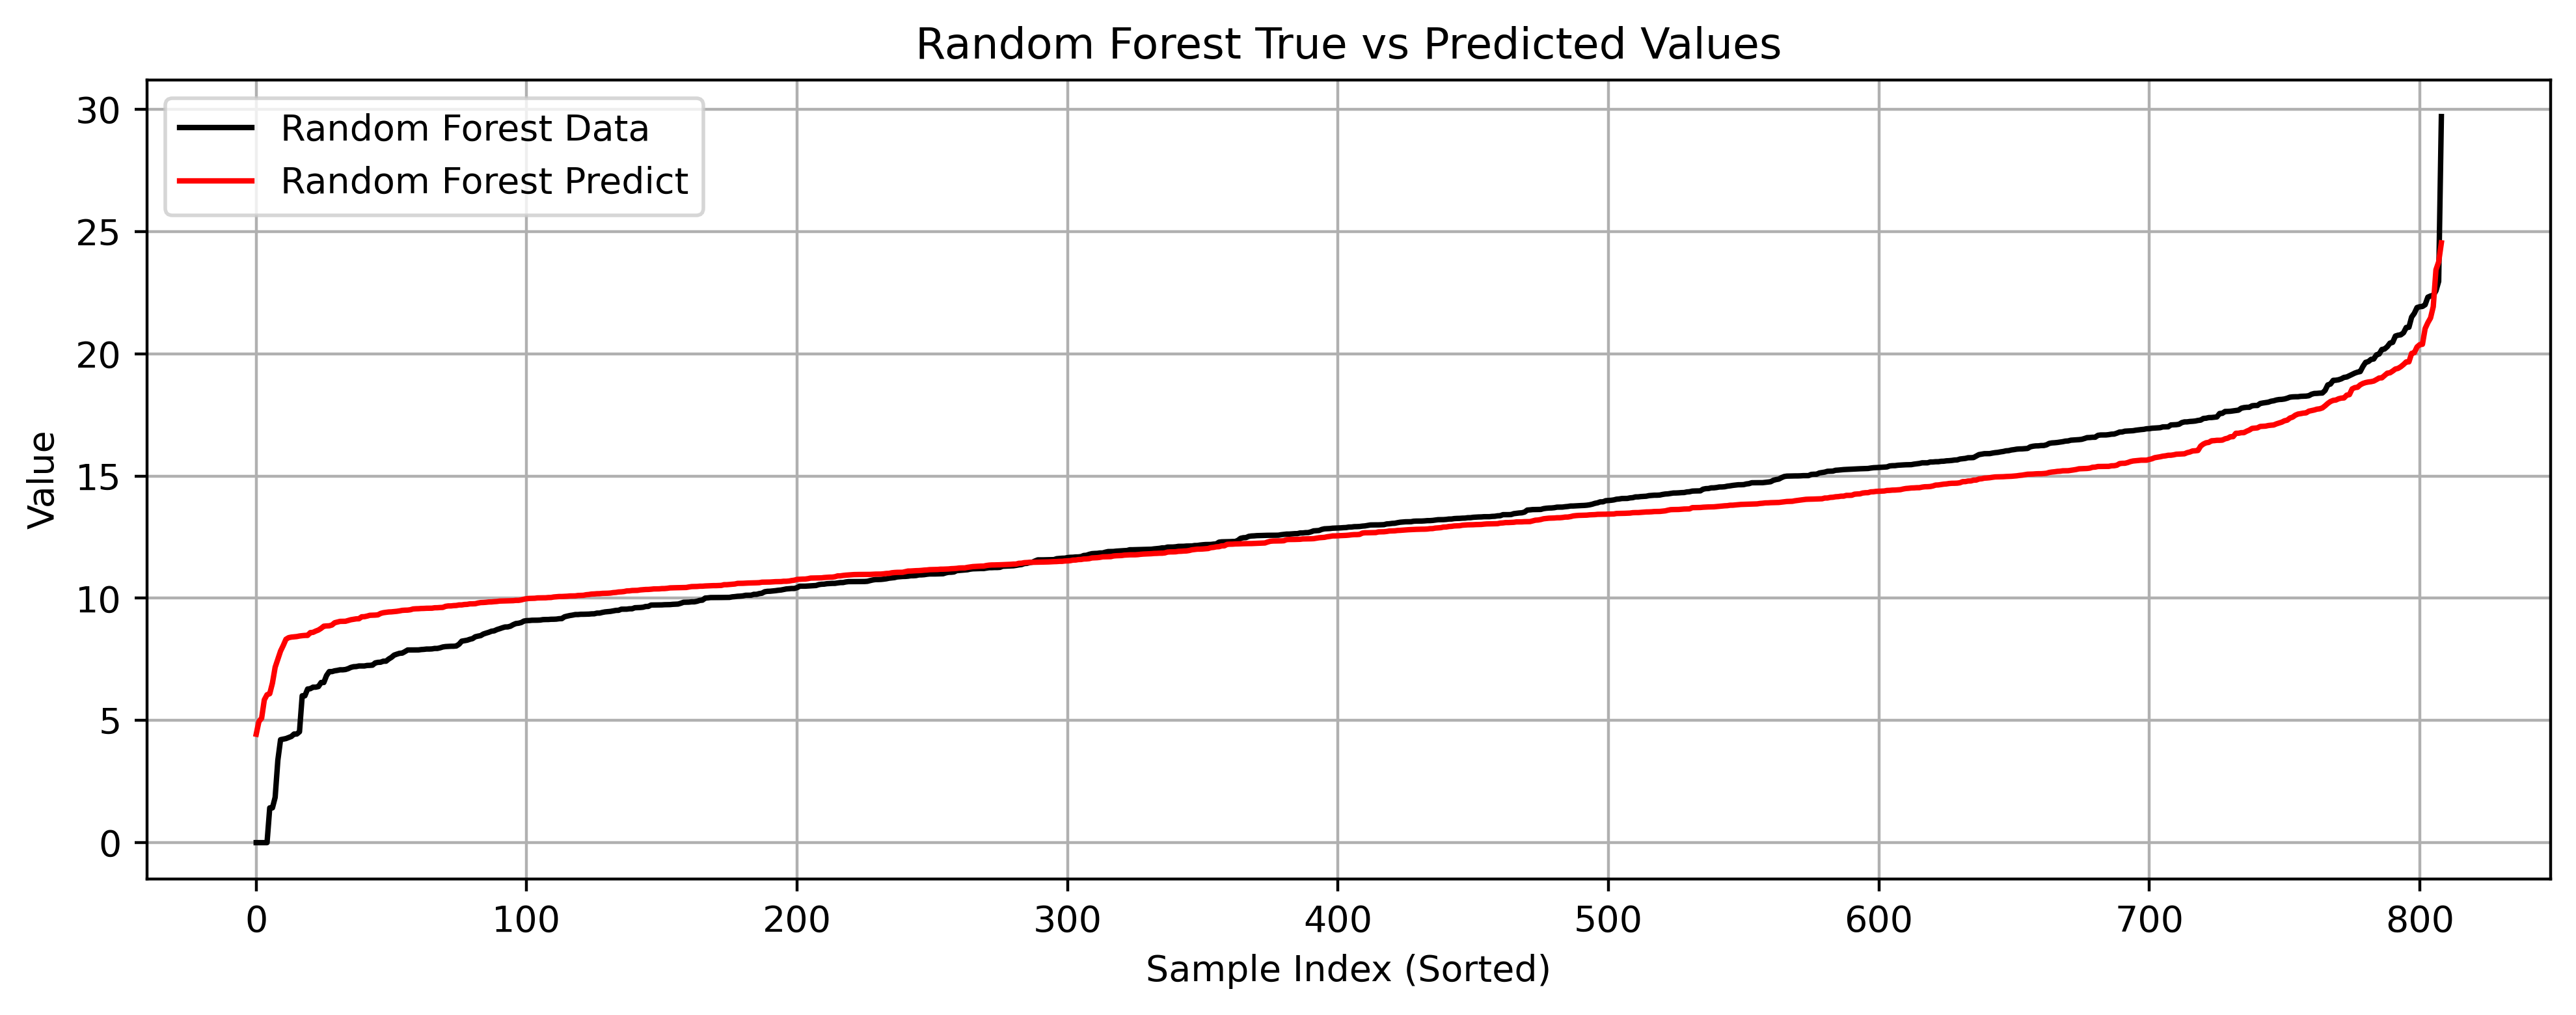

In [110]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def mape(y_true, y_pred):
    """Calculate Mean Absolute Percentage Error."""
    return np.mean(np.abs((y_pred - y_true) / y_true))

def smape(y_true, y_pred):
    """Calculate Symmetric Mean Absolute Percentage Error."""
    return 2.0 * np.mean(np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))

def evaluate_model_performance(y_true, y_pred, model_name="Model"):
    """
    Evaluates and displays the performance of a model using various metrics. 
    Also plots true vs predicted values.
    
    Parameters:
    - y_true (numpy array): Actual target values.
    - y_pred (numpy array): Predicted target values by the model.
    - model_name (str): Name of the model, default is "Model".
    """
    
    # Compute evaluation metrics
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    mape_val = mape(y_true, y_pred)
    smape_val = smape(y_true, y_pred)
    
    # Print metrics
    print(f"The RMSE for {model_name} is {rmse:.4f}")
    print(f"The R-Square for {model_name} is {r2:.4f}")
    print(f"\nThe MAE for {model_name} is {mae:.4f}")
    print(f"The MSE for {model_name} is {mse:.4f}")
    print(f"The MAPE for {model_name} is {mape_val:.4f}")
    print(f"The SMAPE for {model_name} is {smape_val:.4f}")
    
    # Plot true vs predicted values
    plt.figure(figsize=(10, 4), dpi=400)
    plt.plot(range(len(y_true)), sorted(y_true), c="black", label=f"{model_name} Data")
    plt.plot(range(len(y_pred)), sorted(y_pred), c="red", label=f"{model_name} Predict")
    plt.legend()
    plt.xlabel("Sample Index (Sorted)")
    plt.ylabel("Value")
    plt.title(f"{model_name} True vs Predicted Values")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Now evaluate the Random Forest model using the defined function
evaluate_model_performance(y_test, y_pred, "Random Forest")

In [111]:
print(X_train.shape, y_train.shape)

(3236, 29) (3236,)


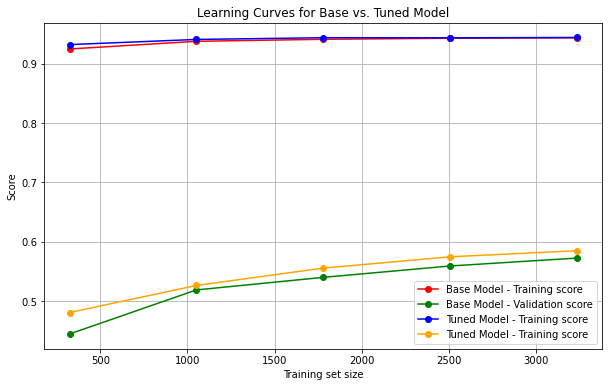

In [112]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import learning_curve

# Define functions to obtain learning curve data
def get_learning_curve_data(estimator, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 5)):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    return train_sizes, train_scores_mean, train_scores_std, test_scores_mean, test_scores_std

X = final_dataset_rf.drop(columns=['EST_COST_TOTAL'])
y = final_dataset_rf['EST_COST_TOTAL']

# Obtain the learning curve data of the base model
base_estimator = RandomForestRegressor(n_estimators=100, random_state=42)
base_train_sizes, base_train_mean, base_train_std, base_test_mean, base_test_std = get_learning_curve_data(base_estimator, X, y)

# Obtain learning curve data for optimized models
tuned_estimator = RandomForestRegressor(n_estimators=500, max_depth=20, max_features=0.4, min_samples_split=2, random_state=42)
tuned_train_sizes, tuned_train_mean, tuned_train_std, tuned_test_mean, tuned_test_std = get_learning_curve_data(tuned_estimator, X, y)

# Learning curve
plt.figure(figsize=(10, 6))
plt.title("Learning Curves for Base vs. Tuned Model")

# Base model
# plt.fill_between(base_train_sizes, base_train_mean - base_train_std, base_train_mean + base_train_std, alpha=0.1, color="r")
# plt.fill_between(base_train_sizes, base_test_mean - base_test_std, base_test_mean + base_test_std, alpha=0.1, color="r")
plt.plot(base_train_sizes, base_train_mean, 'o-', color="red", label="Base Model - Training score")
plt.plot(base_train_sizes, base_test_mean, 'o-', color="green", label="Base Model - Validation score")

# Tuned model
# plt.fill_between(tuned_train_sizes, tuned_train_mean - tuned_train_std, tuned_train_mean + tuned_train_std, alpha=0.1, color="b")
# plt.fill_between(tuned_train_sizes, tuned_test_mean - tuned_test_std, tuned_test_mean + tuned_test_std, alpha=0.1, color="b")
plt.plot(tuned_train_sizes, tuned_train_mean, 'o-', color="blue", label="Tuned Model - Training score")
plt.plot(tuned_train_sizes, tuned_test_mean, 'o-', color="orange", label="Tuned Model - Training score")
plt.xlabel("Training set size")
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid()
plt.show()

/Users/gongxinyi/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei


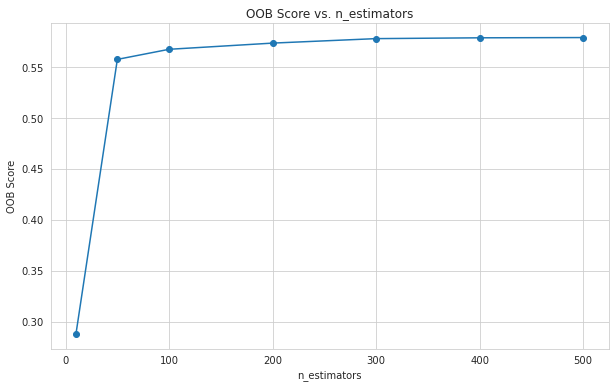

500

In [32]:
# Define a range of values for n_estimators
n_estimators_range = [10, 50, 100, 200, 300, 400, 500]

# Store the OOB scores for each value of n_estimators
oob_scores = []

# Train a Random Forest for each value of n_estimators and record the OOB score
for n in n_estimators_range:
    rf_oob = RandomForestRegressor(n_estimators=n, oob_score=True, random_state=42)
    rf_oob.fit(X_train, y_train)
    oob_scores.append(rf_oob.oob_score_)

# Plot the OOB scores for each value of n_estimators
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, oob_scores, marker='o')
plt.title('OOB Score vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('OOB Score')
plt.grid(True)
plt.show()

# Return the best n_estimators based on OOB score
best_n_estimators = n_estimators_range[np.argmax(oob_scores)]
best_n_estimators

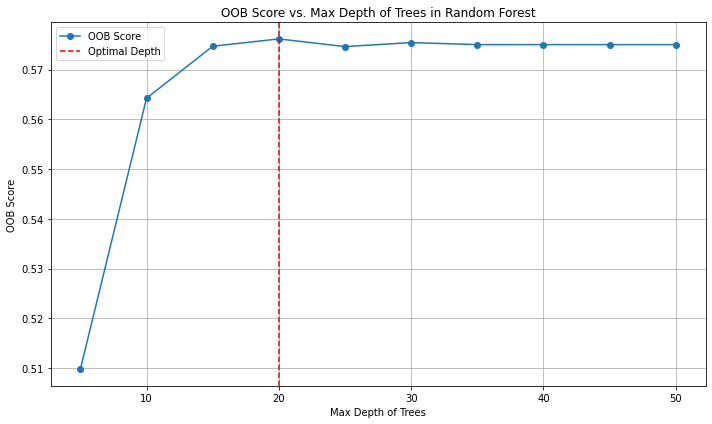

20

In [47]:
from sklearn.ensemble import RandomForestRegressor

# Re-evaluate OOB scores for different tree depths
oob_scores_depth = []

max_depths = [None, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

for max_depth in max_depths:
    rf = RandomForestRegressor(n_estimators=500, max_depth=max_depth, oob_score=True, random_state=42)
    rf.fit(X_train, y_train)
    oob_scores_depth.append(rf.oob_score_)

# Plotting the OOB scores for different tree depths
plt.figure(figsize=(10,6))
plt.plot(max_depths, oob_scores_depth, marker='o', label="OOB Score")
plt.xlabel('Max Depth of Trees')
plt.ylabel('OOB Score')
plt.title('OOB Score vs. Max Depth of Trees in Random Forest')
plt.axvline(x=max_depths[np.argmax(oob_scores_depth)], color='r', linestyle='--', label="Optimal Depth")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Return the optimal depth
optimal_depth = max_depths[np.argmax(oob_scores_depth)]
optimal_depth

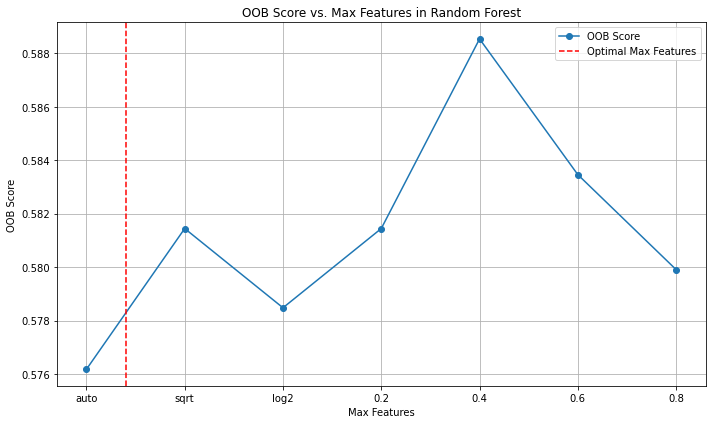

0.4

In [51]:
# List to store OOB scores for different values of max_features
oob_scores_features = []

# List of values to test for max_features
max_features_values = ['auto', 'sqrt', 'log2', 0.2, 0.4, 0.6, 0.8]

# Evaluate OOB scores for different values of max_features
for max_features in max_features_values:
    rf = RandomForestRegressor(n_estimators=500, max_depth=20, max_features=max_features, oob_score=True, random_state=42)
    rf.fit(X_train, y_train)
    oob_scores_features.append(rf.oob_score_)

# Plotting the OOB scores for different values of max_features
plt.figure(figsize=(10,6))
plt.plot(max_features_values, oob_scores_features, marker='o', label="OOB Score")
plt.xlabel('Max Features')
plt.ylabel('OOB Score')
plt.title('OOB Score vs. Max Features in Random Forest')
plt.axvline(x=max_features_values[np.argmax(oob_scores_features)], color='r', linestyle='--', label="Optimal Max Features")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Return the optimal max_features value
optimal_max_features = max_features_values[np.argmax(oob_scores_features)]
optimal_max_features

In [55]:
# Train and evaluate a random forest with bootstrap=True
rf_bootstrap_true = RandomForestRegressor(n_estimators=500, max_depth=20, max_features=0.4, bootstrap=True, random_state=42)
rf_bootstrap_true.fit(X_train, y_train)
y_pred_true = rf_bootstrap_true.predict(X_test)
score_true = r2_score(y_test, y_pred_true)

# Train and evaluate a random forest with bootstrap=False
rf_bootstrap_false = RandomForestRegressor(n_estimators=500, max_depth=20, max_features=0.4, bootstrap=False, random_state=42)
rf_bootstrap_false.fit(X_train, y_train)
y_pred_false = rf_bootstrap_false.predict(X_test)
score_false = r2_score(y_test, y_pred_false)

score_true, score_false

(0.6676999924774296, 0.6615723681141489)

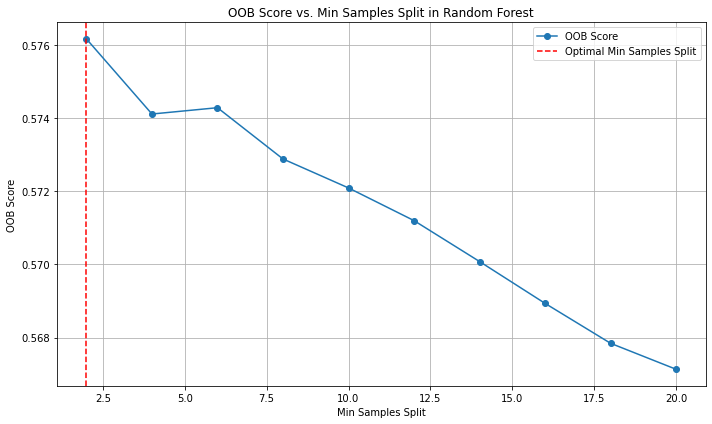

2

In [57]:
# List to store OOB scores for different values of min_samples_split
oob_scores_min_samples = []

# List of values to test for min_samples_split
min_samples_values = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]

# Evaluate OOB scores for different values of min_samples_split
for min_samples in min_samples_values:
    rf = RandomForestRegressor(n_estimators=500, max_depth=20, min_samples_split=min_samples, oob_score=True, random_state=42)
    rf.fit(X_train, y_train)
    oob_scores_min_samples.append(rf.oob_score_)

# Plotting the OOB scores for different values of min_samples_split
plt.figure(figsize=(10,6))
plt.plot(min_samples_values, oob_scores_min_samples, marker='o', label="OOB Score")
plt.xlabel('Min Samples Split')
plt.ylabel('OOB Score')
plt.title('OOB Score vs. Min Samples Split in Random Forest')
plt.axvline(x=min_samples_values[np.argmax(oob_scores_min_samples)], color='r', linestyle='--', label="Optimal Min Samples Split")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Return the optimal min_samples_split value
optimal_min_samples = min_samples_values[np.argmax(oob_scores_min_samples)]
optimal_min_samples

1. Feature UNINTENTIONAL_RELEASE_BBLS - 0.21720857910247293
2. Feature RECOVERED_BBLS - 0.12559277877612912
3. Feature INCIDENT_AREA_TYPE - 0.10056779098891092
4. Feature LOCATION_LONGITUDE - 0.07250429833807379
5. Feature LOCATION_TYPE - 0.05492396465059022
6. Feature ACCIDENT_PSIG - 0.05264587935139972
7. Feature LOCATION_LATITUDE - 0.051399414951096276
8. Feature PIPE_FAC_NAME - 0.04803323280205448
9. Feature RELEASE_TYPE - 0.03423599200471204
10. Feature WATER_CONTAM_IND - 0.027680788433251145
11. Feature CAUSE - 0.027432928589333314
12. Feature ITEM_INVOLVED - 0.024624881660660885
13. Feature SOIL_CONTAMINATION - 0.019291327378558126
14. Feature ACCIDENT_IDENTIFIER - 0.016138864735327697
15. Feature SYSTEM_PART_INVOLVED - 0.015491150956544032
16. Feature COMMODITY_RELEASED_TYPE - 0.015415045005600182
17. Feature INTENTIONAL_RELEASE_BBLS - 0.012532590669299792
18. Feature OPERATION_COMPLICATIONS_IND - 0.011287137970620021
19. Feature INTERNAL_INSPECTION_IND - 0.011260537825756261
2

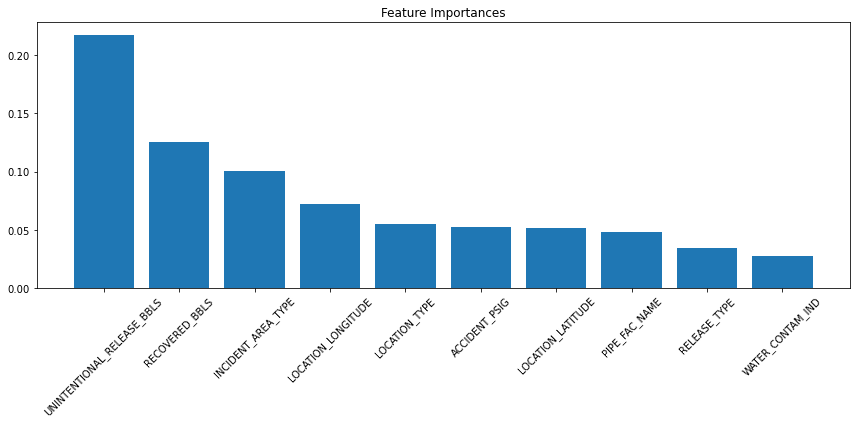

In [113]:
# Get the feature importances
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort the feature importances in descending order

# Print the features and their importance
feature_names = X_train.columns  # Get feature names
for f in range(X_train.shape[1]):
    print(f"{f + 1}. Feature {feature_names[indices[f]]} - {importances[indices[f]]}")

N = 10  # Number of features to display

# Visualize the feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(N), importances[indices[:N]], align="center")
plt.xticks(range(N), [feature_names[i] for i in indices[:N]], rotation=45)
plt.tight_layout()
plt.show()